In [53]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report

# Defining Dataset 

In [12]:
# Define the dataset structure
train_dir = 'train/train_data'
test_dir = 'test/test_data'

# Data Generators

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    subset='validation'
)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='grayscale',
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 3552 images belonging to 2 classes.
Found 886 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


# Defining Funtion to create and compile the model

In [14]:
# Define a function to create and compile the model
def create_model(loss):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss=loss, metrics=['accuracy'])
    return model


# Defining the number of epochs, loss functions and initializing list to store the results

In [15]:
# Define the number of epochs
epochs = 50

# Define a list of loss functions to compare
loss_functions = ['binary_crossentropy', 'hinge', 'mean_squared_error']

# Initialize lists to store results
accuracies = []
losses = []

# Iterating over each loss function and training the model

In [22]:
# Initialize lists to store accuracy for each loss function
test_accuracy_dict = {loss_function: [] for loss_function in loss_functions}

# Initialize lists to store losses and accuracy for each loss function
train_losses_dict = {loss_function: [] for loss_function in loss_functions}
train_accuracy_dict = {loss_function: [] for loss_function in loss_functions}

# Iterate over each loss function
for loss_function in loss_functions:
    print(f"Training with loss function: {loss_function}")
    # Create and compile the model
    model = create_model(loss_function)
    
    # Callbacks
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

    # Training
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[early_stopping, model_checkpoint]
    )
    
    # Store training losses and accuracy
    train_losses_dict[loss_function] = history.history['loss']
    train_accuracy_dict[loss_function] = history.history['accuracy']
    
    # Evaluation
    test_loss, test_accuracy = model.evaluate(test_generator)
    test_accuracy_dict[loss_function] = test_accuracy
    print(f'Test accuracy with {loss_function}: {test_accuracy:.4f}')

Training with loss function: binary_crossentropy
Epoch 1/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.5034 - loss: 0.7003 - val_accuracy: 0.6174 - val_loss: 0.6550
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 170ms/step - accuracy: 0.5907 - loss: 0.6659 - val_accuracy: 0.6501 - val_loss: 0.6355
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.6519 - loss: 0.6210 - val_accuracy: 0.6546 - val_loss: 0.6161
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.6724 - loss: 0.6077 - val_accuracy: 0.6828 - val_loss: 0.5830
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 160ms/step - accuracy: 0.6957 - loss: 0.5711 - val_accuracy: 0.6941 - val_loss: 0.5664
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 162ms/step - accuracy: 0.6921 - loss: 0.5667 - val_accuracy: 0.7032 - val_loss: 0.5520
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 18s 161ms/step - accuracy: 0.7268 - loss: 0.5452 - val_accuracy: 0.6986 - val_loss: 0.5597
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━

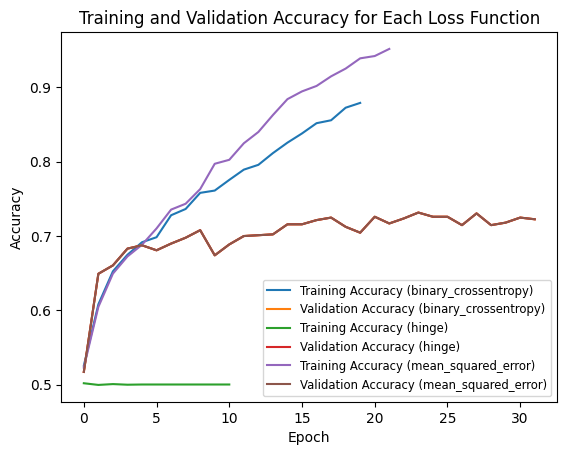

In [62]:
# Plot training and validation accuracy for each loss function
for loss_function in loss_functions:
    plt.plot(train_accuracy_dict[loss_function], label=f'Training Accuracy ({loss_function})')
    plt.plot(history.history['val_accuracy'], label=f'Validation Accuracy ({loss_function})')

plt.title('Training and Validation Accuracy for Each Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(fontsize = 'small')
plt.show()

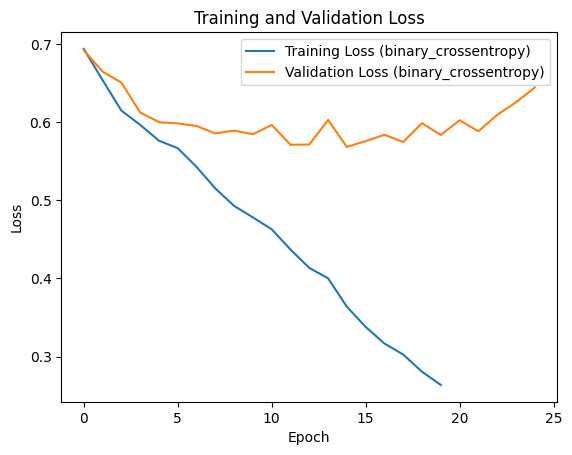

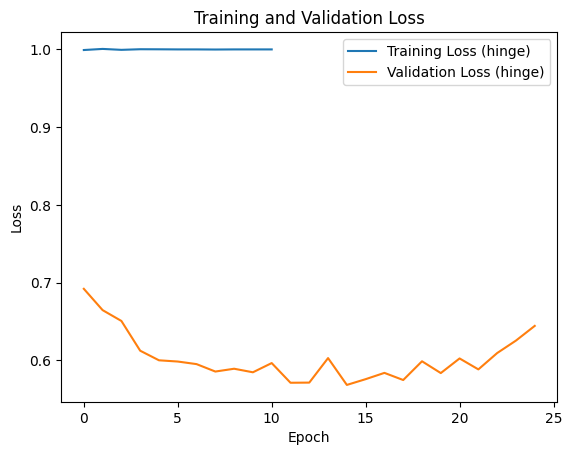

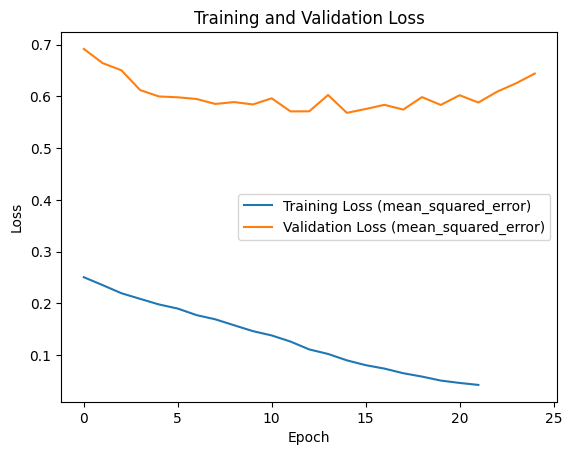

In [55]:
# Iterate over each loss function
for loss_function in loss_functions:
    # Plot training and validation loss
    plt.plot(train_losses_dict[loss_function], label=f'Training Loss ({loss_function})')
    plt.plot(history.history['val_loss'], label=f'Validation Loss ({loss_function})')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Plot scatter plot for training losses

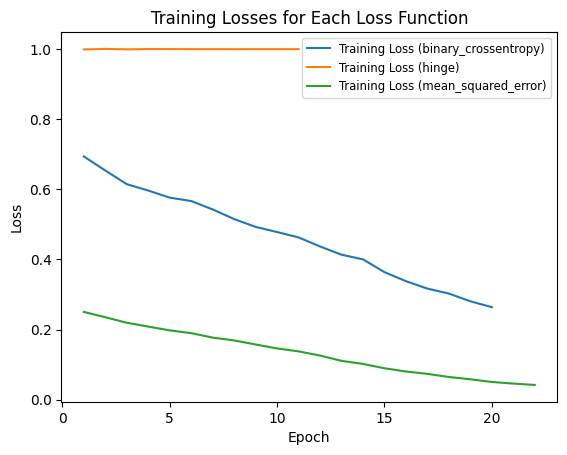

In [27]:
for loss_function, train_losses in train_losses_dict.items():
    plt.plot(range(1, len(train_losses) + 1), train_losses, label=f'Training Loss ({loss_function})')
plt.title('Training Losses for Each Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(fontsize='small')
plt.show()

# Plot scatter plot for training accuracy

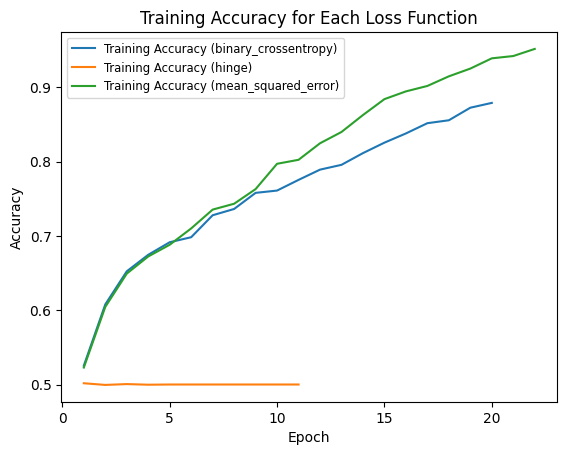

In [28]:
for loss_function, train_accuracy in train_accuracy_dict.items():
    plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label=f'Training Accuracy ({loss_function})')
plt.title('Training Accuracy for Each Loss Function')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(fontsize='small')
plt.show()

# Implemented more drop out layers to overcome overfitting using the binary cross entropy loss function and learning rate 0.001

In [56]:
# Define the model with dropout layers
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Add dropout layer
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Add dropout layer
    Dense(1, activation='sigmoid')
])

# Compile the model with the current learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model with data augmentation
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1  # Set verbose to 1 to display training progress
)

Epoch 1/50


C:\Users\altaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


111/111 ━━━━━━━━━━━━━━━━━━━━ 27s 232ms/step - accuracy: 0.5169 - loss: 0.7072 - val_accuracy: 0.5169 - val_loss: 0.6899
Epoch 2/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 24s 216ms/step - accuracy: 0.5106 - loss: 0.6907 - val_accuracy: 0.6490 - val_loss: 0.6416
Epoch 3/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 207ms/step - accuracy: 0.5952 - loss: 0.6662 - val_accuracy: 0.6603 - val_loss: 0.6247
Epoch 4/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 25s 227ms/step - accuracy: 0.6622 - loss: 0.6303 - val_accuracy: 0.6828 - val_loss: 0.5936
Epoch 5/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 24s 213ms/step - accuracy: 0.6480 - loss: 0.6218 - val_accuracy: 0.6874 - val_loss: 0.5982
Epoch 6/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 23s 205ms/step - accuracy: 0.6842 - loss: 0.5932 - val_accuracy: 0.6806 - val_loss: 0.5895
Epoch 7/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.6790 - loss: 0.5950 - val_accuracy: 0.6896 - val_loss: 0.5647
Epoch 8/50
111/111 ━━━━━━━━━━━━━━━━━━━━ 22s 199ms/step - accuracy: 0.6849 - loss: 0.5795 - val

# Plotting graph for test and validation against accuracy

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6686 - loss: 0.5279
Test accuracy: 0.7280


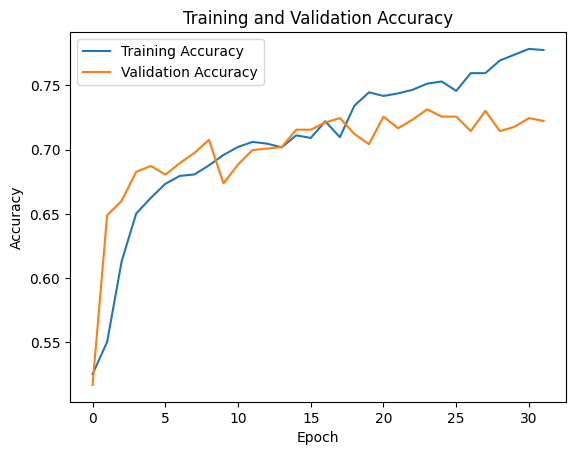

In [58]:
test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy[1]:.4f}')
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot accuracies for each loss function

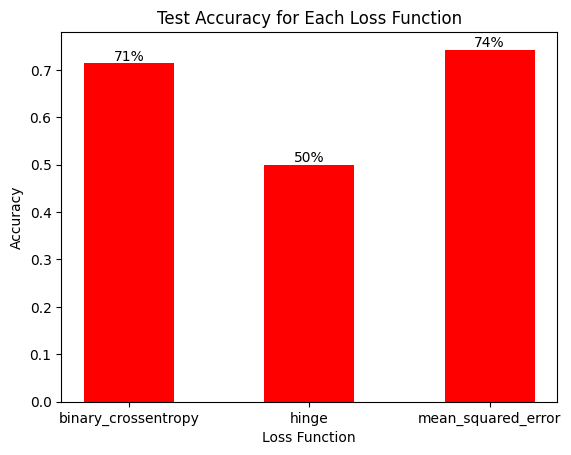

In [51]:
# Set the positions of the bars on the x-axis
bar_positions = range(len(loss_functions))

plt.bar(bar_positions, test_accuracy_dict.values(), color='red', width=bar_width)

# Set the x-axis tick positions and labels
plt.xticks(bar_positions, loss_functions)

plt.title('Test Accuracy for Each Loss Function')
plt.xlabel('Loss Function')
plt.ylabel('Accuracy')

# Add percentages on top of each bar
for i, accuracy in enumerate(test_accuracy_dict.values()):
    plt.text(i, accuracy, f'{accuracy:.0%}', ha='center', va='bottom')

plt.show()

# Iterating over each learning rate and training the model

In [39]:
# Define the range of learning rates to explore
learning_rates = [0.001, 0.01, 0.1]

# Initialize lists to store results
accuracies = []
losses = []

# Iterate over each learning rate
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    # Define the model
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    # Compile the model with the current learning rate
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # Callbacks
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

    # Train the model
    history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        callbacks=[early_stopping,model_checkpoint],
        verbose=0  # Set verbose to 0 to suppress training output
    )
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_generator)
    accuracies.append(test_accuracy)
    losses.append(test_loss)
    print(f'Test accuracy with learning rate {lr}: {test_accuracy:.4f}')

Training with learning rate: 0.001


C:\Users\altaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.6442 - loss: 0.5634
Test accuracy with learning rate 0.001: 0.7208
Training with learning rate: 0.01
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.8281 - loss: 0.6900
Test accuracy with learning rate 0.01: 0.5000
Training with learning rate: 0.1
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1719 - loss: 0.7084
Test accuracy with learning rate 0.1: 0.5000


# Plot how learning rate affects accuracy

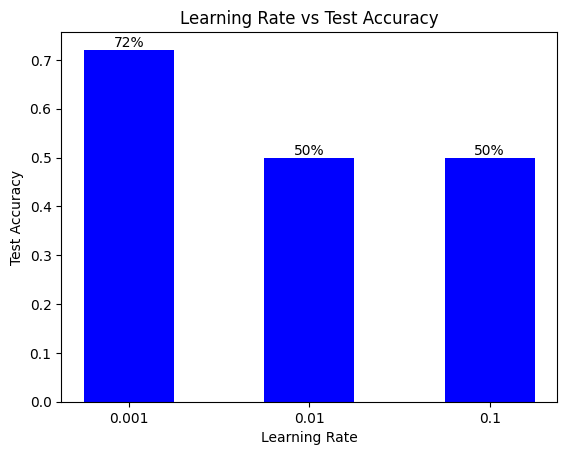

In [50]:
# Set the width of the bars
bar_width = 0.5

# Set the positions of the bars on the x-axis
bar_positions = range(len(learning_rates))

plt.bar(bar_positions, accuracies, color='blue', width=bar_width)

# Set the x-axis tick positions and labels
plt.xticks(bar_positions, learning_rates)

plt.title('Learning Rate vs Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')

# Add percentages on top of each bar
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy, f'{accuracy:.0%}', ha='center', va='bottom')

plt.show()

# Running a model with the binary crossentropy loss function to get confusion matrix

In [52]:

# Iterate over each learning rate
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with the current learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping,model_checkpoint],
    verbose=0  # Set verbose to 0 to suppress training output
)
# Predictions
predictions = (model.predict(test_generator) > 0.5).astype("int32")


C:\Users\altaa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


NameError: name 'confusion_matrix' is not defined

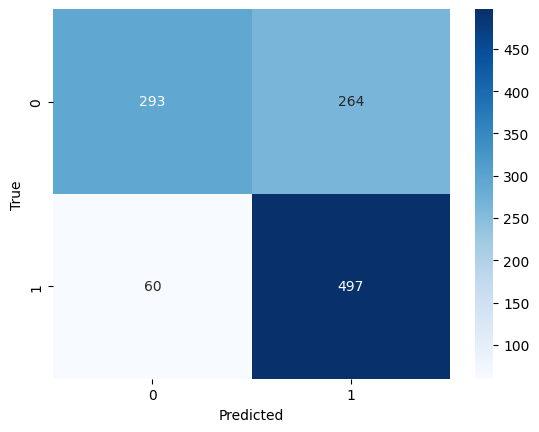

In [54]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()